# Basics of Cluster Analysis

We explore the very basics of cluster analysis with k-means.

## Import the Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Styles to Seaborn
sns.set()

# Import the KMeans Module so We Can Perform k-Means Clustering With sklearn
from sklearn.cluster import KMeans

## Load the Data

In [2]:
# Load the Country Clusters Data
data = pd.read_csv('Countries.csv')

In [3]:
# Check Out the Data Manually 
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Plot the Data

<function matplotlib.pyplot.show(close=None, block=None)>

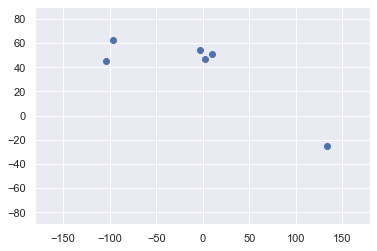

In [4]:
# Use the Simplest Code Possible to Create a Scatterplot Using the Longitude and Latitude
# Note: In Order to Reach a Result Resembling the World Map, We Must Use the Longitude as y and the Latitude as x
plt.scatter(data['Longitude'], data['Latitude'])

# Set Limits of the Axes, Again to Resemble the World Map
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show

## Select the Features

In [5]:
# iloc is a Method Used to 'Slice' Data 
# 'slice' is Not Technically Correct as There Are Methods 'slice' Which Are a Bit Different
# The Term Used by pandas Is 'Selection by Position'
# The First Argument Identifies the Rows to Keep
# The First Argument Identifies the Columns to Keep
# When Choosing the Columns (e.g. a:b, We Will Keep Columns a, a + 1, a + 2,..., b - 1 ; so Column b is Excluded)
x = data.iloc[:, 1:3]
# For This Particular Case, We Are Choosing Columns 1 and 2

In [6]:
# Check If It Worked Correctly
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Clustering

This is the part of the sheet which deals with the actual clustering.

In [7]:
# Create an Object Called kmeans
# The Number In the Brackets Is K, or the Number of Clusters We Are Aiming For
kmeans = KMeans(3)

In [8]:
# Fit the Input Data (i.e. Cluster the Data In X In K Clusters)
kmeans.fit(x)

KMeans(n_clusters=3)

## Clustering Results

There are many ways to do this part. This is the most illustrative one.

In [9]:
# Create a Variable Which Will Contain the Predicted Clusters For Each Observation
identified_clusters = kmeans.fit_predict(x)

# Check the Result
identified_clusters

array([0, 0, 1, 1, 1, 2])

In [10]:
# Create a Copy of the Data
data_with_clusters = data.copy()

# Create a New Series Containing the Identified Cluster For Each Observation
data_with_clusters['Cluster'] = identified_clusters

# Check the Result
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,2


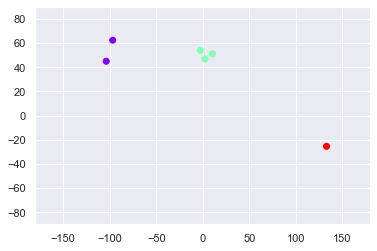

In [11]:
# Plot the Data Using the longitude and the latitude
# c (Color) Is an Argument Which Could be Coded With a Variable 
# The Variable In This Case Has Values 0, 1, and 2, Indicating to plt.scatter That There Are Three Colors (0, 1, and 2)
# All Points In Cluster 0 Will be the Same Color, All Points In Cluster 1 Another, etc.
# cmap is the Color Map. Rainbow Is a Nice One, but You Can Check Others Here: https://matplotlib.org/users/colormaps.html.
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c = data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()